# 遺伝的アルゴリズム
最もシンプルな例
- 問題はknapsack問題の類似(重みを均等に二分割する問題)
- 選択(selection)はルーレット選択法
- 交叉(cross over)は一様交叉法
- 突然変異(mutation)は１点のみ

In [1]:
import random
import copy
import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
N = 1000
weights = np.random.random(N)
print(weights.sum())

488.2729585447738


In [3]:
def evaluate(gene):
    return abs(weights.sum() / 2. - weights[gene].sum())

def get_chromosome():
    gene = np.random.choice([True, False], size=N)
    score = evaluate(gene)
    return {'gene': gene, 'score': score}

def select_pair(chromosomes, sum_fit):
    ch_idx1, ch_idx2 = np.random.choice(NUM_CHROMOSOME, size=2,
        p=[(1 / ch['score']) / sum_fit for ch in chromosomes])
    return ch_idx1, ch_idx2

def cross_pair(gene1, gene2):
    # gene1, gene2 -> gene
    cross_size = np.random.randint(1, N - 1)
    cross_idxs = np.random.choice(N, size=cross_size, replace=False)
    gene = copy.deepcopy(gene1)
    gene[cross_idxs] = gene2[cross_idxs]
    return gene

def mutate(gene):
    # gene -> gene
    mut_idx = np.random.randint(N)
    gene[mut_idx] = ~gene[mut_idx]
    return gene

generation:1	 best:0.0780	 worst:17.6798	 mean:3.4787	 elapsed time:0.02 [sec]
generation:50	 best:0.0012	 worst:0.7429	 mean:0.0284	 elapsed time:0.63 [sec]
generation:100	 best:0.0012	 worst:0.9418	 mean:0.0517	 elapsed time:1.28 [sec]
generation:150	 best:0.0012	 worst:0.9591	 mean:0.0346	 elapsed time:1.91 [sec]
generation:200	 best:0.0002	 worst:0.6658	 mean:0.0122	 elapsed time:2.53 [sec]
generation:250	 best:0.0002	 worst:0.6390	 mean:0.0144	 elapsed time:3.17 [sec]
generation:300	 best:0.0002	 worst:0.8982	 mean:0.0299	 elapsed time:3.79 [sec]
generation:350	 best:0.0002	 worst:0.7762	 mean:0.0123	 elapsed time:4.42 [sec]
generation:400	 best:0.0002	 worst:0.9371	 mean:0.0429	 elapsed time:5.05 [sec]
generation:450	 best:0.0002	 worst:0.9362	 mean:0.0364	 elapsed time:5.68 [sec]
generation:500	 best:0.0001	 worst:0.5181	 mean:0.0130	 elapsed time:6.30 [sec]


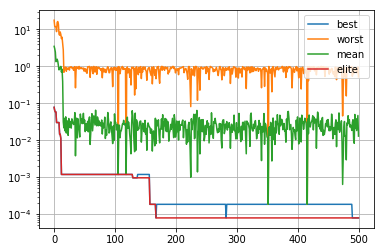

In [4]:
# parameter
MAX_GENERATION = 500
NUM_CHROMOSOME = 100
MUT_PB = 0.05
CX_PB = 0.8

# init
chromosomes = [get_chromosome() for _ in range(NUM_CHROMOSOME)]

# array for plot
means = []
worsts = []
bests = []
elites = []
start = time.time()

# save elite
elite_chromosome = get_chromosome()

for generation in range(1, MAX_GENERATION+1):
    
    sum_fit = sum([1. / ch['score'] for ch in chromosomes])
    new_chromosomes = []
    
    for _ in range(NUM_CHROMOSOME):
        # select pair
        ch_idx1, ch_idx2 = select_pair(chromosomes, sum_fit)
        gene1 = chromosomes[ch_idx1]['gene']
        gene2 = chromosomes[ch_idx2]['gene']
        
        # crossing
        if np.random.random() <= CX_PB:
            gene = cross_pair(gene1, gene2)
        else:
            gene = copy.deepcopy(gene1)
        
        # mutation
        if np.random.random() <= MUT_PB:
            gene = mutate(gene)
        
        new_chromosomes.append({
            'gene': gene,
            'score': evaluate(gene)
        })
    
    chromosomes = new_chromosomes

    # calc summary
    mean_score  = sum([ch['score'] for ch in chromosomes]) / NUM_CHROMOSOME
    worst_score = max([ch['score'] for ch in chromosomes])
    best_score  = min([ch['score'] for ch in chromosomes])
    means.append(mean_score)
    worsts.append(worst_score)
    bests.append(best_score)
    
    # save elite
    best_chromosome = sorted(chromosomes, key=lambda ch: ch['score'])[0]
    if elite_chromosome['score'] > best_chromosome['score']:
        elite_chromosome = best_chromosome
    elites.append(elite_chromosome['score'])
    
    # print summary
    if generation % 50 == 0 or generation == 1:
        print("generation:{gen}\t best:{best:.4f}\t worst:{worst:.4f}\t mean:{mean:.4f}\t elapsed time:{time:.2f} [sec]".format(
            gen=generation,
            best=best_score,
            worst=worst_score,
            mean=mean_score,
            time=time.time() - start))
    
# graph plot
plt.plot(bests, label="best")
plt.plot(worsts, label="worst")
plt.plot(means, label="mean")
plt.plot(elites, label="elite")
plt.grid()
plt.yscale('log')
plt.legend()
plt.show()